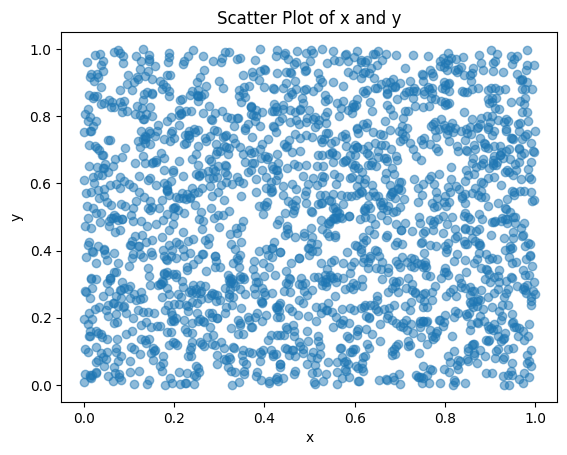

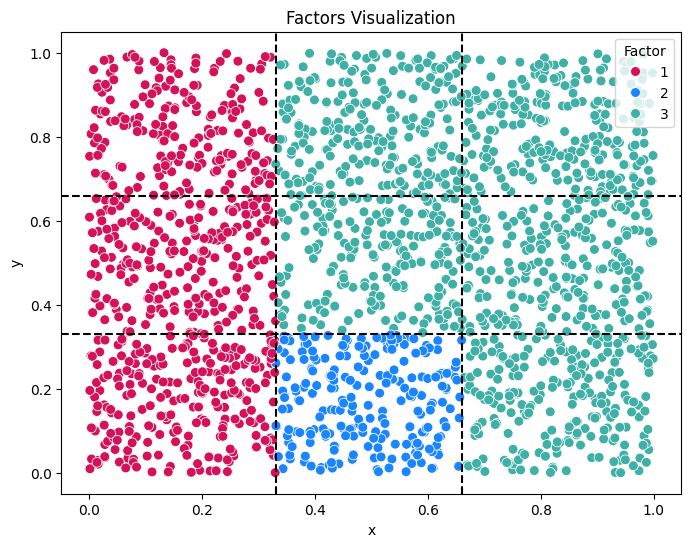

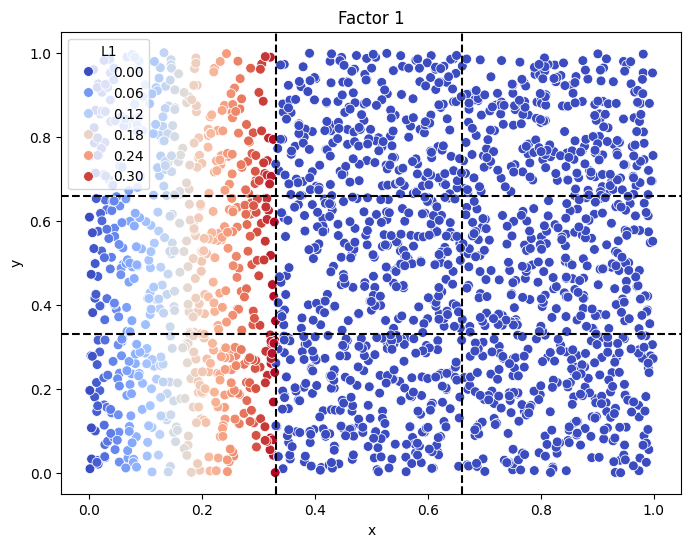

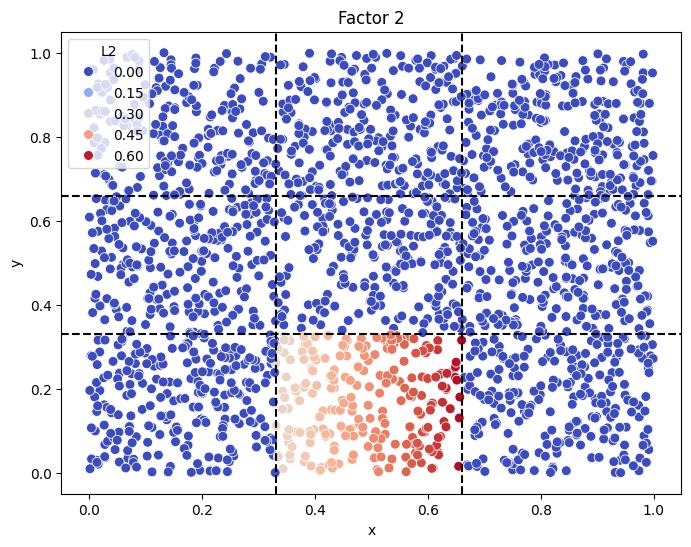

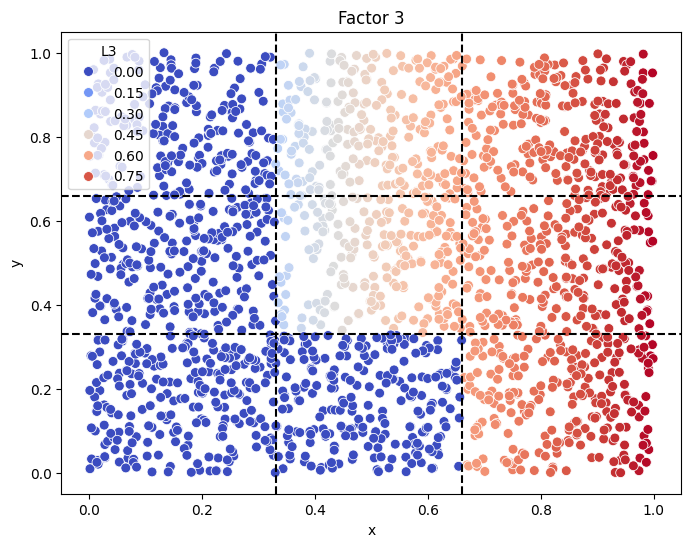

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(1)

# Generate random uniform data
x = np.random.uniform(size=2000)
y = np.random.uniform(size=2000)
X = np.column_stack((x, y))

# Plot the scatter plot of x and y
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y")
plt.show()

# Generate matrix f
f = np.empty((3, 200))
for i in range(f.shape[1]):
    t1 = np.random.choice([0, 1], size=1)[0]
    t2 = np.random.choice([0, 1], size=1)[0]
    f[0, i] = t1 * np.random.randn()
    f[1, i] = t2 * np.random.randn()
    f[2, i] = t2 * np.random.randn()

# Initialize matrix L and factor array
L = np.empty((len(x), 3))
factor = []

# Populate L and factor arrays
for i in range(len(x)):
    if (x[i] < 0.33  )  :
        L[i, :] = [np.sin  (x[i]), 0, 0]
        factor.append(1)
    elif   (0.33 < x[i] < 0.66 and y[i] < 0.33) :
        L[i, :] = [0, np.sin  (x[i]), 0]
        factor.append(2)
    else:
        L[i, :] = [0, 0,np.sin  (x[i])]
        factor.append(3)

# Convert to DataFrame
df = pd.DataFrame({"x": x, "y": y, "Factor": factor})

# Colors for the plot
colors = ["#D41159", "#1A85FF", "#40B0A6"]

# Plot factor visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette=colors, s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()

# Create individual factor plots
for i in range(3):
    df[f"L{i+1}"] = L[:, i]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x="x",
        y="y",
        hue=f"L{i+1}",
        palette="coolwarm",
        s=50
    )
    plt.axhline(0.33, color="black", linestyle="--")
    plt.axhline(0.66, color="black", linestyle="--")
    plt.axvline(0.33, color="black", linestyle="--")
    plt.axvline(0.66, color="black", linestyle="--")
    plt.title(f"Factor {i+1}") 
    plt.show()

# Generate Z matrix
Z = L @ f + np.random.randn(L.shape[0], f.shape[1])  *2.5


In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
ebmf= cEBMF(data= np.array(Z),
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace", K=3)

In [4]:
ebmf.init_LF()
for i in range(50):
    ebmf.iter()

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in sca

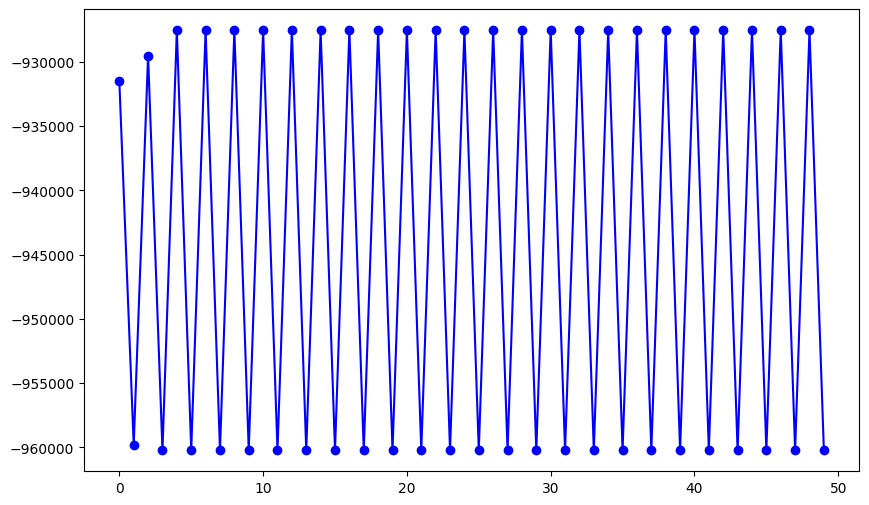

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(ebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [6]:
ebmf.L

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], shape=(2000, 3), dtype=float32)

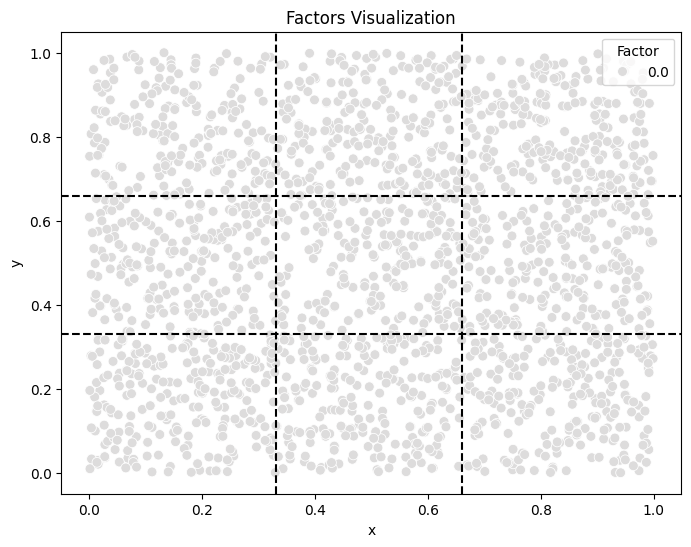

In [7]:

df = pd.DataFrame({"x": x, "y": y, "Factor":ebmf.L[:,0]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


In [8]:
mycebmf_cgb= cEBMF(data= np.array(Z), K=5,
               prior_L= "cgb", 
                 prior_F= "point_Laplace",
               X_l=X )
mycebmf_cgb.init_LF()
for i in range(7):
    mycebmf_cgb.iter()

Epoch 0, Loss: 0.9983083605766296, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6688024997711182, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6959497332572937, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6679862141609192, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6785984039306641, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.11255035549402237, Sigma_2^2: 0.01363143976777792
Epoch 0, Loss: -0.9584288001060486, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5740640759468079, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.33160996437072754, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.582872748374939, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.14826568961143494, Sigma_2^2: 0.009448564611375332
Epoch 0, Loss: -1.037503957748413, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.623435914516449, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.04301944375038147, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.129022598266602, Sigma_

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in sca

Epoch 0, Loss: -0.1573568731546402, Sigma_2^2: 0.007432684767991304
Epoch 0, Loss: -1.0154670476913452, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.6022734642028809, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.13894549012184143, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.p

Epoch 0, Loss: -0.16018538177013397, Sigma_2^2: 0.0067105405032634735
Epoch 0, Loss: -0.9829913973808289, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5638586282730103, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.19395186007022858, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.p

Epoch 0, Loss: -0.16239219903945923, Sigma_2^2: 0.006219473667442799
Epoch 0, Loss: -0.9490335583686829, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5223488807678223, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.21663179993629456, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.16320815682411194, Sigma_2^2: 0.005975306499749422
Epoch 0, Loss: -0.9127620458602905, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.4723502993583679, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.21895375847816467, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.129027366638184, Sigma_2^2: 9.999999974752427e-07


In [9]:
mycebmf= mycebmf_cgb

In [10]:
mycebmf= cEBMF(data= np.array(Z), K=3,
               prior_L= "emdn",
               X_l=X )
mycebmf.init_LF()
for i in range(7):
    mycebmf.iter()

Epoch 10/50, Loss: 1.1439
Epoch 20/50, Loss: 0.8272
Epoch 30/50, Loss: 0.8044
Epoch 40/50, Loss: 0.8007
Epoch 50/50, Loss: 0.7981
Epoch 10/50, Loss: 0.9915
Epoch 20/50, Loss: 0.6786
Epoch 30/50, Loss: 0.6768
Epoch 40/50, Loss: 0.6761
Epoch 50/50, Loss: 0.6766
Epoch 10/50, Loss: 0.8854
Epoch 20/50, Loss: 0.7043
Epoch 30/50, Loss: 0.7023
Epoch 40/50, Loss: 0.7036
Epoch 50/50, Loss: 0.7017
Epoch 10/50, Loss: 0.1837
Epoch 20/50, Loss: 0.1747
Epoch 30/50, Loss: 0.1655
Epoch 40/50, Loss: 0.1598
Epoch 50/50, Loss: 0.1562
Epoch 10/50, Loss: -1.2559
Epoch 20/50, Loss: -1.3047
Epoch 30/50, Loss: -1.3237
Epoch 40/50, Loss: -1.3287
Epoch 50/50, Loss: -1.3292
Epoch 10/50, Loss: -0.4968
Epoch 20/50, Loss: -0.5103
Epoch 30/50, Loss: -0.5129
Epoch 40/50, Loss: -0.5152
Epoch 50/50, Loss: -0.5183
Epoch 10/50, Loss: 0.1637
Epoch 20/50, Loss: 0.1556
Epoch 30/50, Loss: 0.1516
Epoch 40/50, Loss: 0.1476
Epoch 50/50, Loss: 0.1465
Epoch 10/50, Loss: -1.3314
Epoch 20/50, Loss: -1.4280
Epoch 30/50, Loss: -1.4385

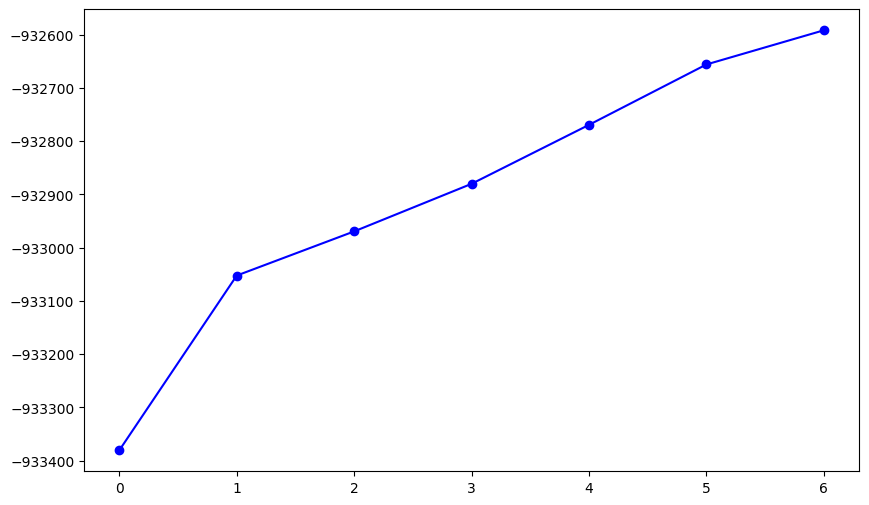

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

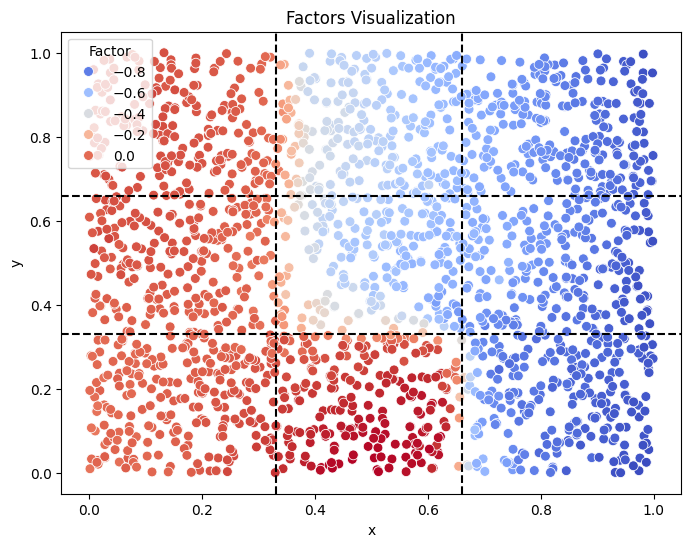

In [12]:

df = pd.DataFrame({"x": x, "y": y, "Factor":mycebmf.L[:,0]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


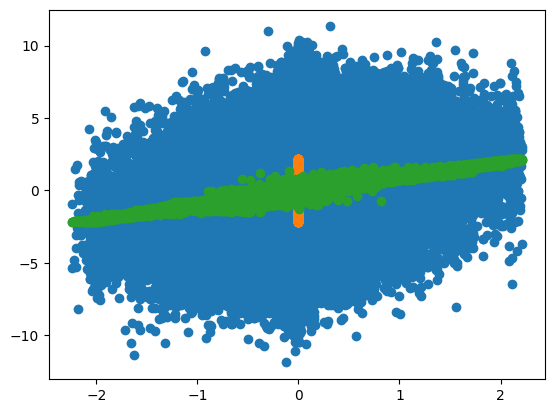

In [13]:
plt.scatter(mycebmf.Y_fit, Z)
 

plt.scatter(ebmf.Y_fit,L @ f )  

plt.scatter(mycebmf.Y_fit,L @ f )  

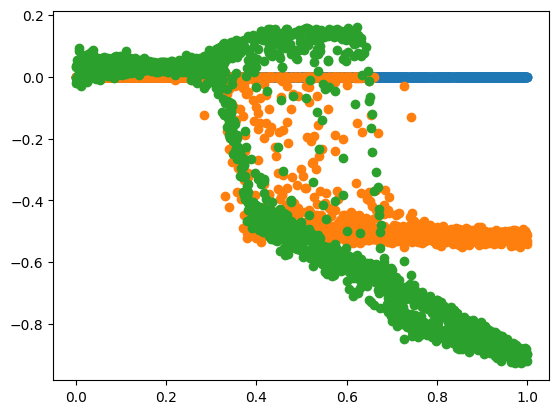

In [14]:

plt.scatter(x, ebmf.L[:,1]) 

plt.scatter(x,mycebmf_cgb.L[:,0]) 
plt.scatter(x,mycebmf.L[:,0]) 

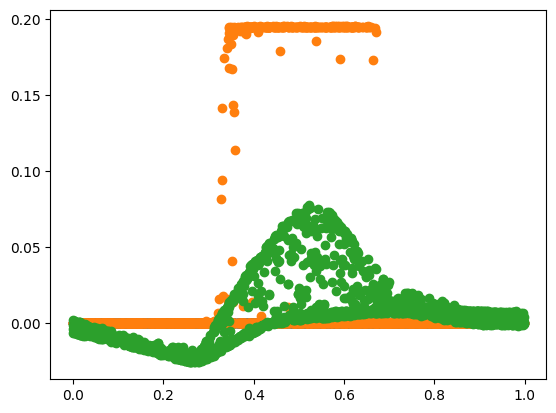

In [15]:

plt.scatter(x, ebmf.L[:,1]) 
plt.scatter(x,mycebmf_cgb.L[:,1]) 
plt.scatter(x,mycebmf.L[:,1]) 

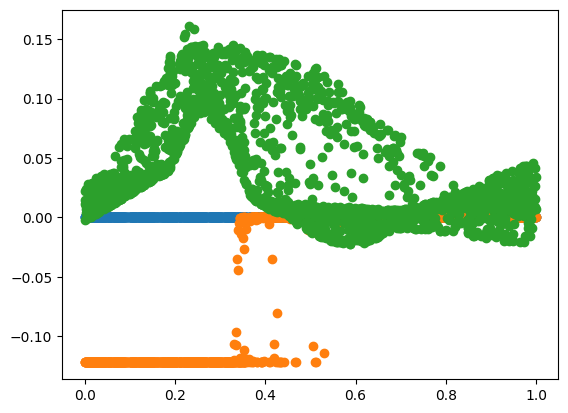

In [16]:
plt.scatter(x, ebmf.L[:,2])
plt.scatter(x,mycebmf_cgb.L[:,2])  
plt.scatter(x,mycebmf.L[:,2]) 

Custom prior

In [17]:

from uni_mod_emdn_loss_corrected import *
def unimod_emdn(X, betahat, sebetahat, model_param):
    res_cash = unimod_emdn_posterior_means(X, betahat,sebetahat, n_epochs=20,  num_classes=5, hidden_dim=64)
    return PriorResult(post_mean=res_cash.post_mean,  post_mean2=res_cash.post_mean2, log_lik=-res_cash.loss)

In [18]:
mycebmfuni= cEBMF(data= np.array(Z), K=3,
               prior_L= unimod_emdn,
               X_l=X )
mycebmfuni.init_LF()
for i in range(7):
    mycebmfuni.iter()

Epoch 10/20, Mean Loss: 890.1884, Variance Loss: 97.1883
Epoch 20/20, Mean Loss: 917.1182, Variance Loss: 96.3781


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\posterior_computation.py:130: RuntimeWarning: invalid value encountered in sqrt
  post_sd    = np.sqrt(post_mean2-post_mean**2)


Epoch 10/20, Mean Loss: 822.7528, Variance Loss: 81.9121
Epoch 20/20, Mean Loss: 860.3053, Variance Loss: 81.8096
Epoch 10/20, Mean Loss: 623.4690, Variance Loss: 85.2497
Epoch 20/20, Mean Loss: 637.7941, Variance Loss: 85.1909
Epoch 10/20, Mean Loss: 470.7704, Variance Loss: 28.3726
Epoch 20/20, Mean Loss: 21.3962, Variance Loss: 22.9357
Epoch 10/20, Mean Loss: 233.1616, Variance Loss: -127.1283
Epoch 20/20, Mean Loss: 234.3418, Variance Loss: -128.7563
Epoch 10/20, Mean Loss: 275.8946, Variance Loss: -117.3269
Epoch 20/20, Mean Loss: 273.0973, Variance Loss: -118.0451
Epoch 10/20, Mean Loss: 22.5234, Variance Loss: 21.3996
Epoch 20/20, Mean Loss: 164.6367, Variance Loss: 25.1216
Epoch 10/20, Mean Loss: 172.9870, Variance Loss: -151.5208
Epoch 20/20, Mean Loss: 219.2426, Variance Loss: -152.5959
Epoch 10/20, Mean Loss: 281.3629, Variance Loss: -122.9875
Epoch 20/20, Mean Loss: 279.0784, Variance Loss: -123.6190
Epoch 10/20, Mean Loss: 357.0540, Variance Loss: -38.0884
Epoch 20/20, Mea

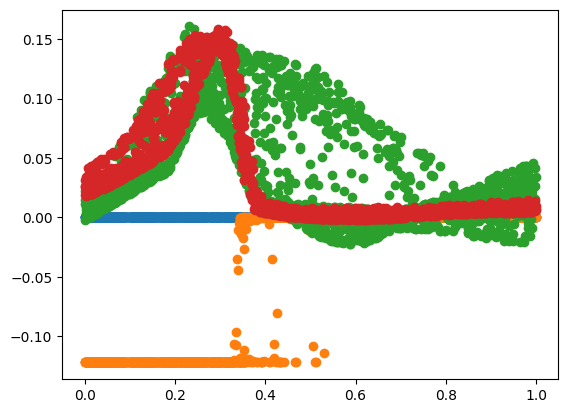

In [19]:
plt.scatter(x, ebmf.L[:,2])
plt.scatter(x,mycebmf_cgb.L[:,2])  
plt.scatter(x,mycebmf.L[:,2]) 
plt.scatter(x, mycebmfuni.L[:,2]) 

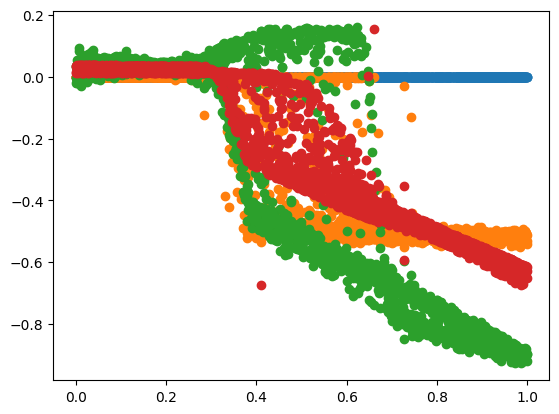

In [20]:
plt.scatter(x, ebmf.L[:,0])
plt.scatter(x,mycebmf_cgb.L[:,0])  
plt.scatter(x,mycebmf.L[:,0]) 
plt.scatter(x, mycebmfuni.L[:,0]) 

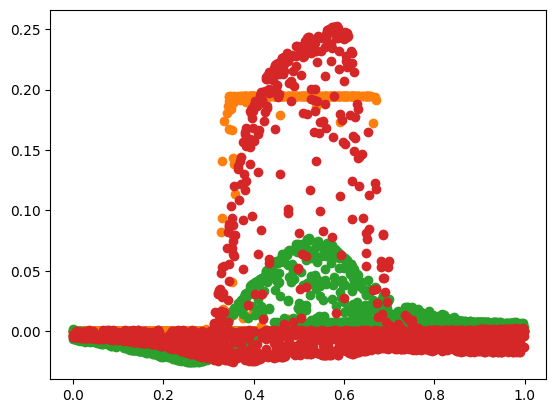

In [21]:
plt.scatter(x, ebmf.L[:,1])
plt.scatter(x,mycebmf_cgb.L[:,1])  
plt.scatter(x,mycebmf.L[:,1]) 
plt.scatter(x, mycebmfuni.L[:,1]) 